# Tugas Besar Machine Learning - Classification
### Indira Alima Fasyazahra - 1301184051
### Annisya Hayati S - 1301180013

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocessing Data

### Loading Datasets

In [2]:
!git clone https://github.com/indirafsyzhr/kendaraan

fatal: destination path 'kendaraan' already exists and is not an empty directory.


In [3]:
dftrain = pd.read_csv('kendaraan/kendaraan_train.csv')
dftrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [4]:
dftrain.shape

(285831, 12)

### Deskripsi Data

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [6]:
dftrain.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Missing Values

In [7]:
dftrain.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

### Drop Data

In [8]:
dftrain = dftrain.drop('id', axis=1)

### Handling Missing Values

In [9]:
dftrain['Umur'] = dftrain['Umur'].fillna(dftrain['Umur'].mean())
dftrain['Kode_Daerah'] = dftrain['Kode_Daerah'].fillna(dftrain['Kode_Daerah'].mean())
dftrain['Premi'] = dftrain['Premi'].fillna(dftrain['Premi'].mean())
dftrain['Kanal_Penjualan'] = dftrain['Kanal_Penjualan'].fillna(dftrain['Kanal_Penjualan'].mean())
dftrain['Lama_Berlangganan'] = dftrain['Lama_Berlangganan'].fillna(dftrain['Lama_Berlangganan'].mean())

In [10]:
dftrain['Jenis_Kelamin'] = dftrain['Jenis_Kelamin'].fillna(dftrain[['Jenis_Kelamin']].mode()['Jenis_Kelamin'][0])
dftrain['Umur_Kendaraan'] = dftrain['Umur_Kendaraan'].fillna(dftrain[['Umur_Kendaraan']].mode()['Umur_Kendaraan'][0])
dftrain['Kendaraan_Rusak'] = dftrain['Kendaraan_Rusak'].fillna(dftrain[['Kendaraan_Rusak']].mode()['Kendaraan_Rusak'][0])
dftrain['SIM'] = dftrain['SIM'].fillna(dftrain[['SIM']].mode()['SIM'][0])
dftrain['Sudah_Asuransi'] = dftrain['Sudah_Asuransi'].fillna(dftrain[['Sudah_Asuransi']].mode()['Sudah_Asuransi'][0])

In [11]:
dftrain.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Data Transformation

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dftrain['Jenis_Kelamin'] = le.fit_transform(dftrain['Jenis_Kelamin'])
dftrain['Umur_Kendaraan'] = le.fit_transform(dftrain['Umur_Kendaraan'])
dftrain['Kendaraan_Rusak'] = le.fit_transform(dftrain['Kendaraan_Rusak'])
dftrain['SIM'] = le.fit_transform(dftrain['SIM'])
dftrain['Sudah_Asuransi'] = le.fit_transform(dftrain['Sudah_Asuransi'])
dftrain

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1,33.0,1,1,1,28029.0,152.0,97.0,0
1,0,48.0,1,39.0,0,2,0,25800.0,29.0,158.0,0
2,0,21.0,1,46.0,1,1,1,32733.0,160.0,119.0,0
3,1,58.0,1,48.0,0,0,1,2630.0,124.0,63.0,0
4,0,50.0,1,35.0,0,2,0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1,4.0,1,1,1,25988.0,152.0,217.0,0
285827,1,21.0,1,46.0,1,1,1,44686.0,152.0,50.0,0
285828,1,23.0,1,50.0,1,1,1,49751.0,152.0,226.0,0
285829,0,68.0,1,7.0,1,0,1,30503.0,124.0,270.0,0


### Visualisasi Boxplot

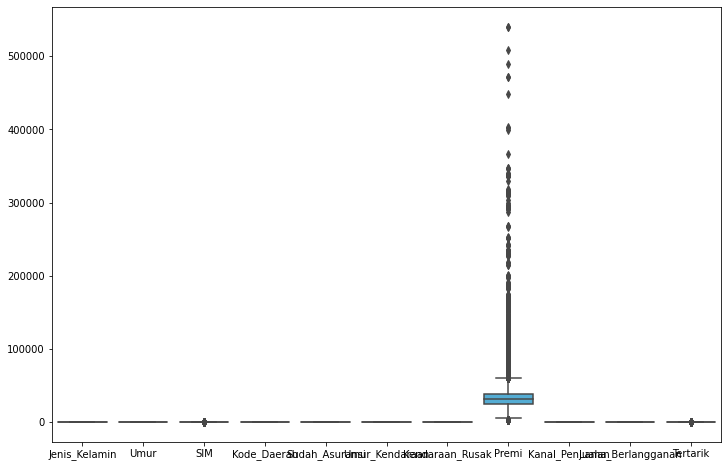

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=dftrain)
plt.show()

### Handling Outliers

In [14]:
def remove_outlier(df):
  q1 = df['Premi'].quantile(0.25)
  q3 = df['Premi'].quantile(0.75)
  iqr = q3 - q1
  df_final = df[~((df['Premi']<(q1-(1.5*iqr))) | (df['Premi']>(q3+(1.5*iqr))))]
  return df_final

In [15]:
dftrain = remove_outlier(dftrain)

In [17]:
dftrain.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dftrain.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Visualisasi Korelasi Tiap Data

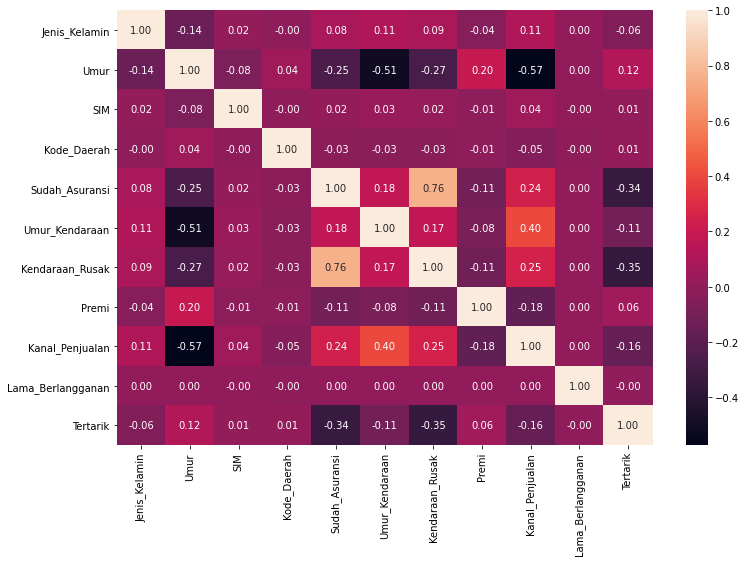

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(dftrain.corr(), annot=True, fmt='.2f')

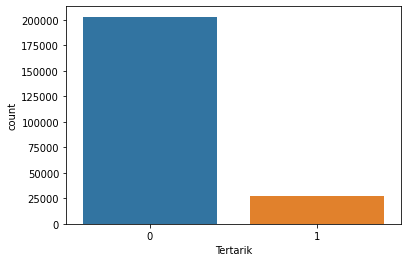

In [34]:
sns.countplot(x=dftrain['Tertarik'], data=dftrain)

### Loading Dataset

In [20]:
dftest = pd.read_csv('kendaraan/kendaraan_test.csv')
dftest.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [21]:
dftest.shape

(47639, 11)

### Deskripsi Data

In [22]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [23]:
dftest.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,112.180566,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,54.162703,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,135.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Missing Values

In [24]:
dftest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Handling Missing Values

In [25]:
dftest['Umur'] = dftest['Umur'].fillna(dftest['Umur'].mean())
dftest['Kode_Daerah'] = dftest['Kode_Daerah'].fillna(dftest['Kode_Daerah'].mean())
dftest['Kanal_Penjualan'] = dftest['Kanal_Penjualan'].fillna(dftest['Kanal_Penjualan'].mean())
dftest['Lama_Berlangganan'] = dftest['Lama_Berlangganan'].fillna(dftest['Lama_Berlangganan'].mean())

In [26]:
dftest['Jenis_Kelamin'] = dftest['Jenis_Kelamin'].fillna(dftrain[['Jenis_Kelamin']].mode()['Jenis_Kelamin'][0])
dftest['Umur_Kendaraan'] = dftest['Umur_Kendaraan'].fillna(dftrain[['Umur_Kendaraan']].mode()['Umur_Kendaraan'][0])
dftest['Kendaraan_Rusak'] = dftest['Kendaraan_Rusak'].fillna(dftrain[['Kendaraan_Rusak']].mode()['Kendaraan_Rusak'][0])
dftest['SIM'] = dftest['SIM'].fillna(dftrain[['SIM']].mode()['SIM'][0])
dftest['Sudah_Asuransi'] = dftest['Sudah_Asuransi'].fillna(dftrain[['Sudah_Asuransi']].mode()['Sudah_Asuransi'][0])

In [27]:
dftest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

### Data Transformation

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dftest['Jenis_Kelamin'] = le.fit_transform(dftest['Jenis_Kelamin'])
dftest['Umur_Kendaraan'] = le.fit_transform(dftest['Umur_Kendaraan'])
dftest['Kendaraan_Rusak'] = le.fit_transform(dftest['Kendaraan_Rusak'])
dftest['SIM'] = le.fit_transform(dftest['SIM'])
dftest['Sudah_Asuransi'] = le.fit_transform(dftest['Sudah_Asuransi'])
dftest

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61,1,46,0,2,0,31039,124,67,0
47635,0,41,1,15,0,0,0,2630,157,232,0
47636,0,24,1,29,1,1,1,33101,152,211,0
47637,0,59,1,30,0,0,0,37788,26,239,1


### Visualisasi Boxplot

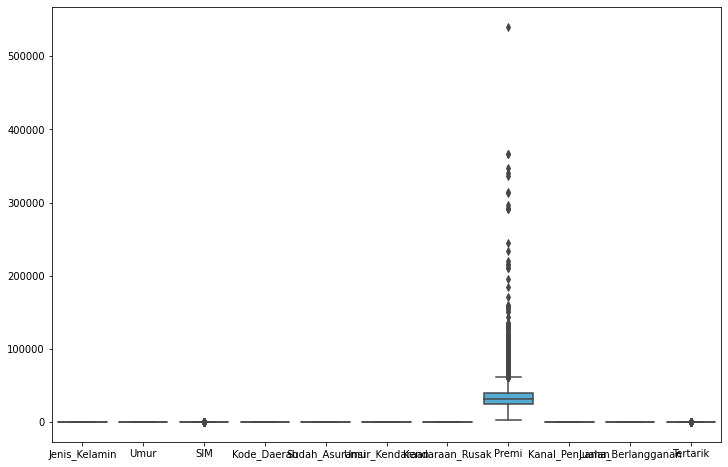

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=dftest)
plt.show()

### Handling Outliers

In [30]:
dftest = remove_outlier(dftest)

In [32]:
dftest.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
dftest.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

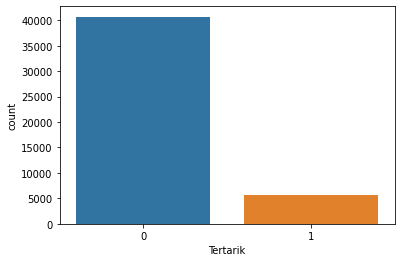

In [35]:
sns.countplot(x=dftest['Tertarik'], data=dftest)

## Preparing Data

### Splitting Data

In [36]:
y_train = dftrain['Tertarik']
X_train = dftrain.drop('Tertarik', axis=1)

In [37]:
y_test = dftest['Tertarik']
X_test = dftest.drop('Tertarik', axis=1)

### Scalling Data

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Data Modelling

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_pred = logreg.predict(X_test)
print('Train Accuracy:', logreg.score(X_train, y_train))
print('Test Accuracy: ', logreg.score(X_test, y_test))

Train Accuracy: 0.8799817937491872
Test Accuracy:  0.8776742581090408


[[40696     0]
 [ 5672     0]]


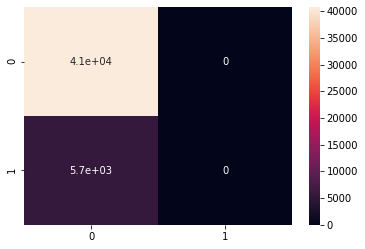

In [40]:
from sklearn.metrics import confusion_matrix
cma1 = confusion_matrix(y_test,lg_pred)
print(cma1)
sns.heatmap(cma1, annot = True)

In [41]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, lg_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     40696
           1       0.00      0.00      0.00      5672

    accuracy                           0.88     46368
   macro avg       0.44      0.50      0.47     46368
weighted avg       0.77      0.88      0.82     46368



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('Train Accuracy:', rf.score(X_train, y_train))
print('Test Accuracy: ', rf.score(X_test, y_test))

Train Accuracy: 0.9999219732108023
Test Accuracy:  0.8671928916494134


[[39683  1013]
 [ 5145   527]]


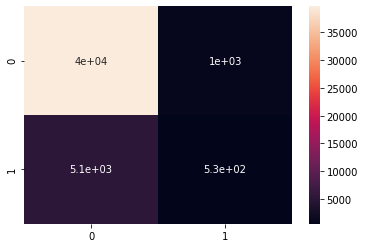

In [43]:
from sklearn.metrics import confusion_matrix
cma2 = confusion_matrix(y_test,rf_pred)
print(cma2)
sns.heatmap(cma2, annot = True)

In [44]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, rf_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93     40696
           1       0.34      0.09      0.15      5672

    accuracy                           0.87     46368
   macro avg       0.61      0.53      0.54     46368
weighted avg       0.82      0.87      0.83     46368



### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
print('Train Accuracy:', nb.score(X_train, y_train))
print('Test Accuracy: ', nb.score(X_test, y_test))

Train Accuracy: 0.6485630066322771
Test Accuracy:  0.6411749482401656


[[24201 16495]
 [  143  5529]]


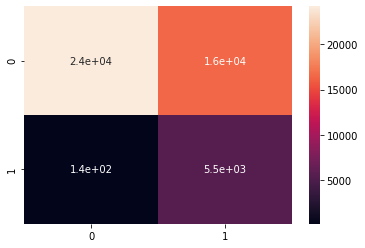

In [46]:
from sklearn.metrics import confusion_matrix
cma4 = confusion_matrix(y_test,nb_pred)
print(cma4)
sns.heatmap(cma4, annot = True)

In [47]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, nb_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     40696
           1       0.25      0.97      0.40      5672

    accuracy                           0.64     46368
   macro avg       0.62      0.78      0.57     46368
weighted avg       0.90      0.64      0.70     46368



### Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print('Train Accuracy:', dtc.score(X_train, y_train))
print('Test Accuracy: ', dtc.score(X_test, y_test))

Train Accuracy: 0.9999479821405349
Test Accuracy:  0.7962172187715666


[[35017  5679]
 [ 3770  1902]]


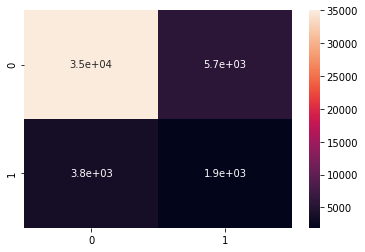

In [49]:
from sklearn.metrics import confusion_matrix
cma5 = confusion_matrix(y_test,dtc_pred)
print(cma5)
sns.heatmap(cma5, annot = True)

In [50]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, dtc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     40696
           1       0.25      0.34      0.29      5672

    accuracy                           0.80     46368
   macro avg       0.58      0.60      0.58     46368
weighted avg       0.82      0.80      0.81     46368



### K-Neighbors Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 4)
knc.fit(X_train,y_train)
knc_pred = knc.predict(X_test)
print('Train Accuracy:', knc.score(X_train, y_train))
print('Test Accuracy: ', knc.score(X_test, y_test))

Train Accuracy: 0.8988902856647449
Test Accuracy:  0.8653812974465148


[[39567  1129]
 [ 5113   559]]


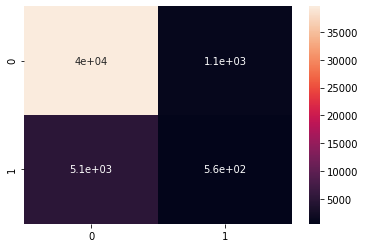

In [52]:
from sklearn.metrics import confusion_matrix
cma6 = confusion_matrix(y_test,knc_pred)
print(cma6)
sns.heatmap(cma6, annot = True)

In [53]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, knc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     40696
           1       0.33      0.10      0.15      5672

    accuracy                           0.87     46368
   macro avg       0.61      0.54      0.54     46368
weighted avg       0.82      0.87      0.83     46368



In [54]:
dftrain.to_csv('final_dftrain.csv')
dftest.to_csv('final_dftest.csv')